# >>>Accredian - Fraudulent Detection Model<<<

Business Context:-


This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.

Candidates can use whatever method they wish to develop their machine learning model. 
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the 
results of your machine learning model

In [2]:
#Importing liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#importing Data 
dataset = pd.read_csv("Fraud.csv")

In [4]:
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

>Dataset Knowledge --> From Domain

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Basic Data exploration

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
dataset.shape

(6362620, 11)

In [9]:
dataset.size

69988820

In [10]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
dataset.describe(include=["object"])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [13]:
dataset.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [14]:
print("Type :", dataset["type"].duplicated())
print("*****************************")

Type : 0          False
1           True
2          False
3          False
4           True
           ...  
6362615     True
6362616     True
6362617     True
6362618     True
6362619     True
Name: type, Length: 6362620, dtype: bool
*****************************


In [15]:
print("TYPE :") 
print(dataset["type"].value_counts())
print("*****************************")

print("STEP :")
print(dataset["step"].value_counts())
print("*****************************")

print("AMOUNT :")
print(dataset["amount"].value_counts())
print("*****************************")

print("PAYEE_NAME :")
print(dataset["nameOrig"].value_counts())
print("*****************************")

print("PAYEE_ACCOUNT_BEFORE_TRANSACTION :")
print(dataset["oldbalanceOrg"].value_counts())
print("*****************************")

print("RECEIVER'S_ACCOUNT_AFTER_TRANSACTION :")
print(dataset["newbalanceOrig"].value_counts())
print("*****************************")

print("RECEIVER'S_NAME :")
print(dataset["nameDest"].value_counts())
print("*****************************")

print(" :", dataset["oldbalanceDest"].value_counts())
print("*****************************")

print(" :", dataset["newbalanceDest"].value_counts())
print("*****************************")

print("FRAUDULENT:")
print(dataset["isFraud"].value_counts())
print("*****************************")

print("FLAGGED_FRAUD:")
print(dataset["isFlaggedFraud"].value_counts())
print("*****************************")


TYPE :
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
*****************************
STEP :
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64
*****************************
AMOUNT :
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: amount, Length: 5316900, dtype: int64
*****************************
PAYEE_NAME :
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64
*****************************
PAYEE_ACCOUNT_BEFORE_TRANSACTION :
0.00  

<Axes: xlabel='type', ylabel='count'>

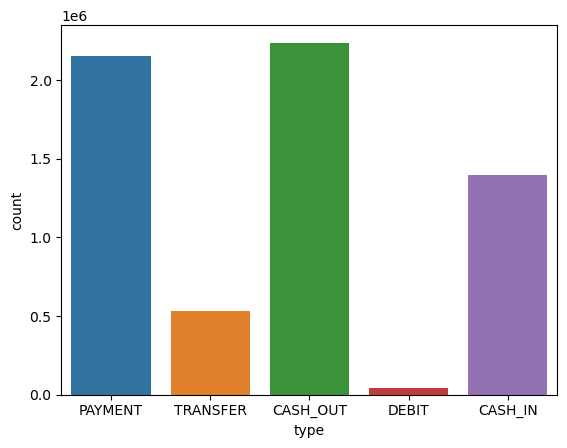

In [15]:
sns.countplot(data=dataset, x='type')

<Axes: xlabel='step', ylabel='count'>

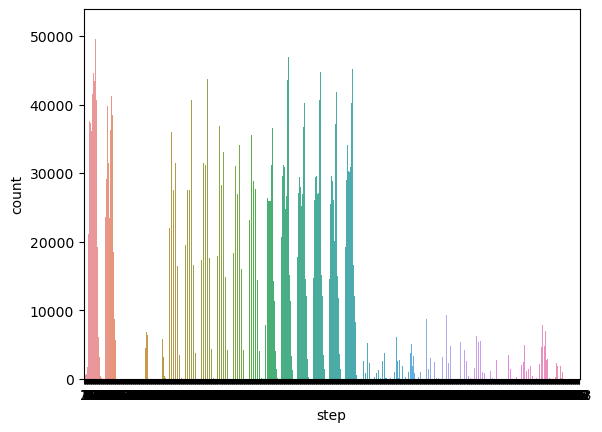

In [16]:
sns.countplot(data=dataset, x='step')

In [ ]:
sns.countplot(data=dataset, x='nameOrig')

In [ ]:
sns.countplot(data=dataset, x='amount')

In [ ]:
sns.countplot(data=dataset, x='nameDest')

# Data Preprocessing
>>1. Data cleaning including missing values, outliers and multi-collinearity. 

# Feature Engineering 

In [20]:
dataset.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [21]:
dataset.isna().sum().sort_values(ascending = False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

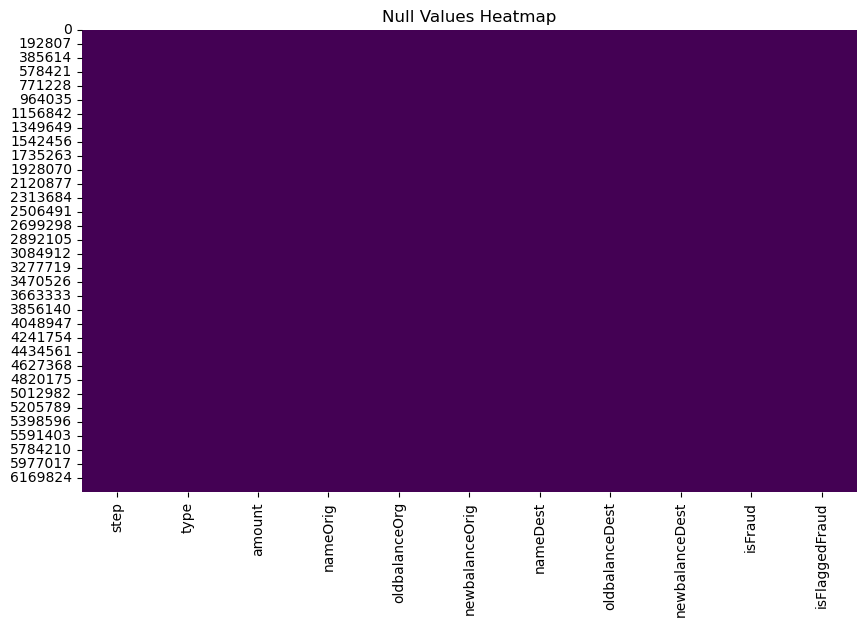

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(), cmap="viridis", cbar=False)
plt.title("Null Values Heatmap")
plt.show()

In [23]:
dataset.duplicated().value_counts()

#(dataset["type"].duplicated().sum()/len(dataset["type"])*100)

False    6362620
dtype: int64

In [24]:
(dataset["isFlaggedFraud"].value_counts())

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [25]:
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


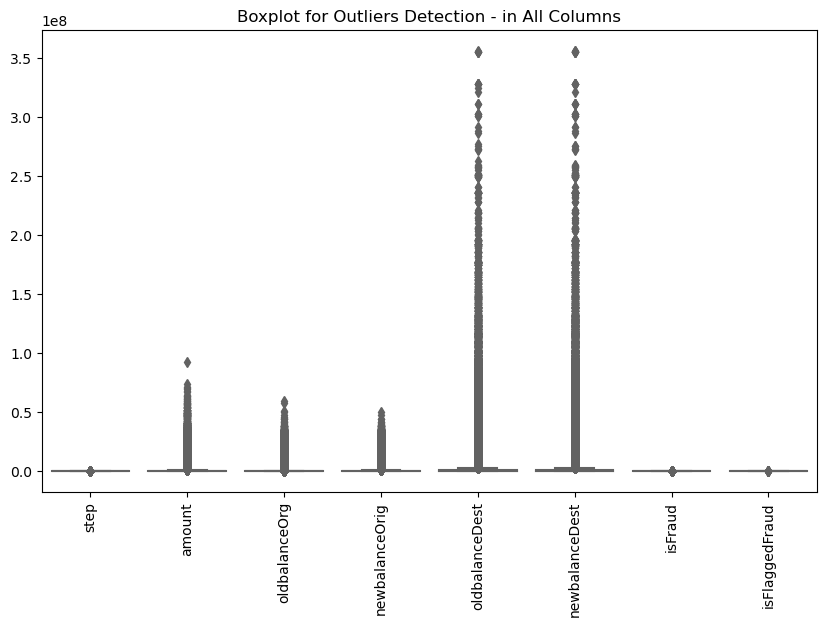

In [26]:
#checking outliers


plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, palette='Set3')
plt.title('Boxplot for Outliers Detection - in All Columns')
plt.xticks(rotation=90)
plt.show()

There are too much of outliers so we cannot impute them. we have to take outliers as a our original data

In [27]:
#Feature Encoding

In [28]:
#encoding  : Convert the categorical data to numerical data
				  #(i) dummy encoding/onehot encoding ---> it should be applied on nominal data
				  #(ii) ordinal encoding              ---> it should be applied on ordinal data
				  #(iii) label encoding		          ---> alphabetical order


from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataset.type=label.fit_transform(dataset.type)
dataset.nameOrig=label.fit_transform(dataset.nameOrig)
dataset.nameDest=label.fit_transform(dataset.nameDest)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [29]:
dataset.head(1500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,1,1,29587.32,6312767,31479.11,1891.79,571482,1751806.56,1015132.48,0,0
1496,1,3,1056.64,4504249,5578.00,4521.36,1940754,0.00,0.00,0,0
1497,1,3,2515.46,3810399,270.00,0.00,1099671,0.00,0.00,0,0
1498,1,2,6077.94,5068717,73904.00,67826.06,505465,11082.00,0.00,0,0


In [30]:
dataset.tail(3789)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6358831,715,3,13834.99,599435,10294.00,0.00,1419822,0.00,0.00,0,0
6358832,715,1,340063.82,4379753,10244.00,0.00,465385,3360890.80,3700954.62,0,0
6358833,715,0,153491.03,6270390,6156.00,159647.03,480724,0.00,0.00,0,0
6358834,715,1,76027.53,1881825,17039.00,0.00,224037,56780.98,132808.50,0,0
6358835,715,0,4738.35,3937590,21368.00,26106.35,500938,3284696.27,3279957.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [31]:
corr_matrix = dataset.corr()
corr_matrix

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


In [32]:
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

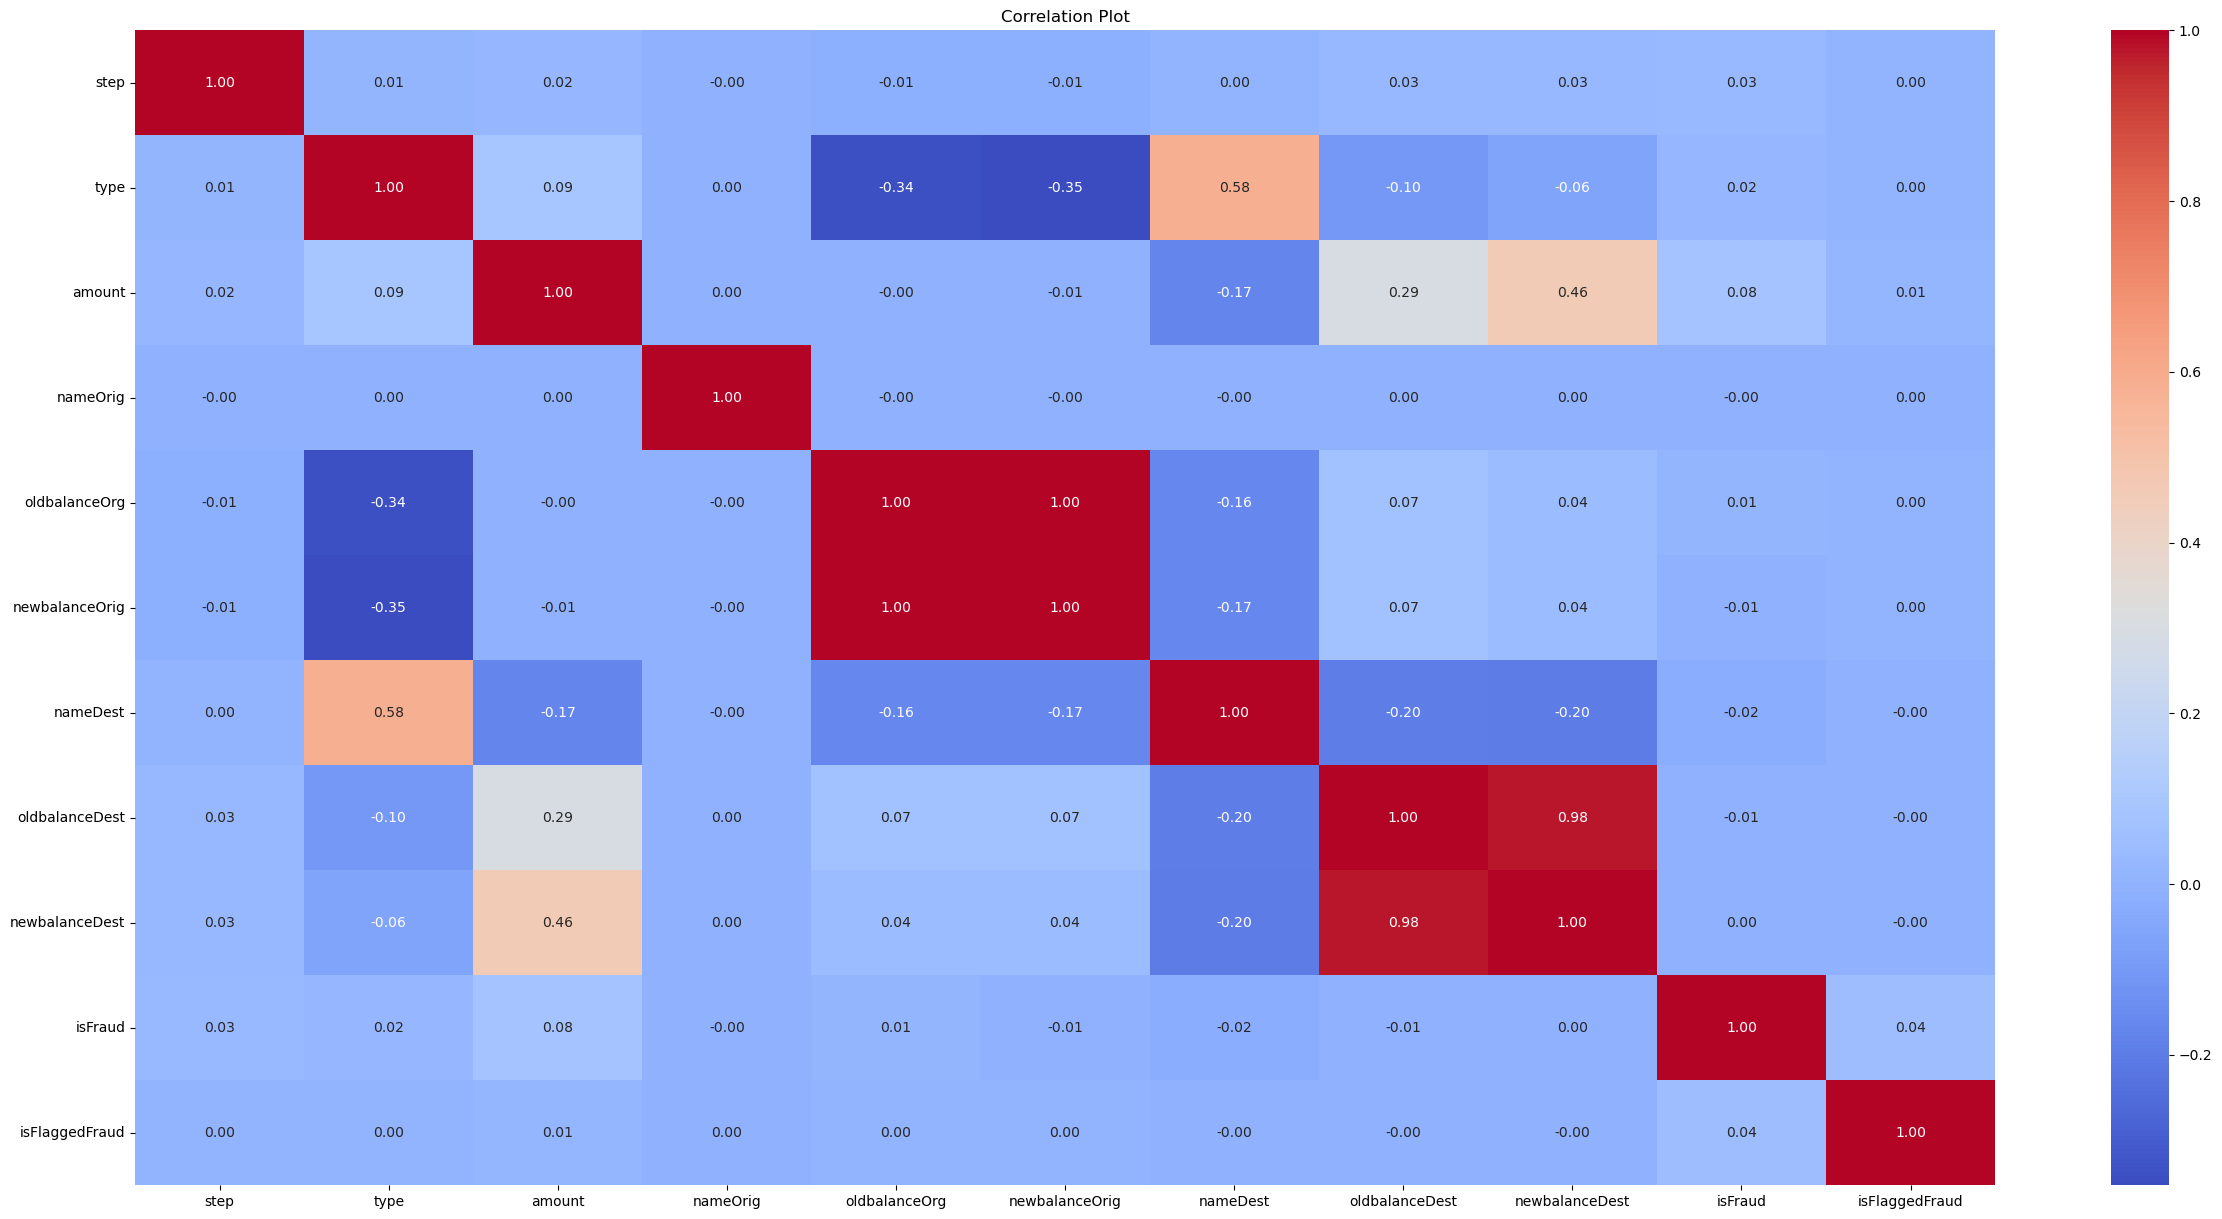

In [33]:
plt.figure(figsize=(30, 15))
sns.heatmap(dataset.corr(), annot=True, fmt= '.2f', cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

In [34]:
sns.pairplot(dataset, hue='type')
plt.show()

3. How did you select variables to be included in the model?
>checking correlation btw target variable with remaining variable

5. What are the key factors that predict fraudulent customer?
>key factors that predict fraudulent customer are isFraud and amount

6. Do these factors make sense? If yes, How? If not, How not?
>yes,they make sense,if the amount is more we can assume it may be fraud and if isfraud is 1, the chances of its isFlaggedFraud is more.

In [71]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# DataSet Split into Train Test

In [83]:
#creating independent and dependent variables X & y

X = dataset.drop(["nameDest", "oldbalanceDest", "isFlaggedFraud", "newbalanceDest"], axis=1)
y = dataset["isFlaggedFraud"] #dependent variable / target variable

In [85]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,isFraud
0,1,3,9839.64,757869,170136.0,160296.36,0
1,1,3,1864.28,2188998,21249.0,19384.72,0
2,1,4,181.00,1002156,181.0,0.00,1
3,1,1,181.00,5828262,181.0,0.00,1
4,1,3,11668.14,3445981,41554.0,29885.86,0


In [86]:
X.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,isFraud
6362615,743,1,339682.13,5651847,339682.13,0.0,1
6362616,743,4,6311409.28,1737278,6311409.28,0.0,1
6362617,743,1,6311409.28,533958,6311409.28,0.0,1
6362618,743,4,850002.52,2252932,850002.52,0.0,1
6362619,743,1,850002.52,919229,850002.52,0.0,1


In [87]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFlaggedFraud, dtype: int64

In [88]:
y.tail()

6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split

# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=39)

In [164]:
X_train.shape

(4453834, 7)

In [165]:
X_test.shape

(1908786, 7)

In [166]:
y_train.shape

(4453834,)

In [167]:
y_test.shape

(1908786,)

In [168]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [169]:
#for col in X_train:
    #print(col)
    #print(kurtosis(dataset[col]))
    
    #plt.figure()
    #sns.histplot(dataset[col], kde=True)
    #plt.show()

In [170]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [171]:
X_train

array([[ 0.44737131,  0.95227751, -0.29740989, ..., -0.2852798 ,
        -0.28924875, -0.03621914],
       [-0.76125224, -0.52883123,  0.01583135, ..., -0.26901606,
        -0.29269059, -0.03621914],
       [ 0.77763472, -0.52883123, -0.22411396, ..., -0.2889622 ,
        -0.29269059, -0.03621914],
       ...,
       [ 1.12897877, -1.2693856 , -0.26733908, ..., -0.28886049,
        -0.28619942, -0.03621914],
       [ 0.54574764,  0.95227751, -0.29670466, ..., -0.28838237,
        -0.29245866, -0.03621914],
       [-1.64663926, -0.52883123,  0.10173353, ..., -0.2889622 ,
        -0.29269059, -0.03621914]])

In [172]:
X_test

array([[ 0.72141967, -0.52883123, -0.20056077, ..., -0.2889622 ,
        -0.29269059, -0.03621914],
       [ 0.27169928, -0.52883123,  0.11213859, ..., -0.28844672,
        -0.29269059, -0.03621914],
       [ 2.81543024,  0.95227751, -0.26879871, ..., -0.28522859,
        -0.29269059, -0.03621914],
       ...,
       [ 1.11492501, -1.2693856 ,  0.35315738, ...,  2.8024205 ,
         2.8951006 , -0.03621914],
       [-1.40069842, -0.52883123, -0.04291196, ..., -0.27730264,
        -0.29269059, -0.03621914],
       [ 0.72844655,  0.95227751, -0.2721945 , ..., -0.17914672,
        -0.18960889, -0.03621914]])

# Modeling --> Import Model Liberaries

In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [187]:
#modeling Decision tree

dtree=DecisionTreeRegressor(max_depth=None, random_state=21, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_features='sqrt', random_state=21)

In [188]:
dtree.score(X_train, y_train)

1.0

In [189]:
dtree.score(X_test, y_test)

0.7499994761057054

In [190]:
#prediction 

p_test = dtree.predict(X_test)

In [191]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [192]:
#evaluation
mae(p_test, y_test)

5.238931970372792e-07

In [193]:
#evaluation metrics

def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, y_train)))
    print("validation r^2 " + str(mm.score(X_test, y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 0.7499994761057054
mean absolute error(Train): 0.0
mean absolute error(Validation): 5.238931970372792e-07


In [181]:
p_test = dtree.predict(X_test)

In [182]:
p_test.shape

(1908786,)

7. What kind of prevention should be adopted while company update its infrastructure?
>Set limit to amount transaction, if it extends the limit the person should contact company to verify.

8. Assuming these actions have been implemented, how would you determine if they work?
>if these actions are implemented,I feel it will work better than current situation.

# Hyperparameter Tuning - to improve performance 

In [184]:
# Define the hyperparameters to tune

dtree=DecisionTreeRegressor(random_state = 21)
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
